Import packages.

In [1]:
import os
import pickle
import string
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import add, Input, Dense, LSTM, Embedding, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from nltk.translate.bleu_score import sentence_bleu, corpus_bleu
%matplotlib inline

In [4]:
def extract_features(directory):
    model = VGG16()
    model.layers.pop()
    model = Model(inputs=model.inputs,outputs=model.layers[-1].output)
    print(model.summary())
    features = {}
    i=0
    for name in os.listdir(directory):
        print(i)
        img = load_img(directory+'/'+name,target_size=(224,224))
        img = img_to_array(img)
        img = img.reshape((1,img.shape[0],img.shape[1],img.shape[2]))
        img = preprocess_input(img)
        feature = model.predict(img,verbose=0)
        img_id = name.split('.')[0]
        features[img_id] = feature
        i+=1
    return features

directory ='Flicker8k_Dataset'
features = extract_features(directory)

553467096/553467096 [==============================] - 422s 1us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                          

1127
1128
1129
1130
1131
1132
1133
1134
1135
1136
1137
1138
1139
1140
1141
1142
1143
1144
1145
1146
1147
1148
1149
1150
1151
1152
1153
1154
1155
1156
1157
1158
1159
1160
1161
1162
1163
1164
1165
1166
1167
1168
1169
1170
1171
1172
1173
1174
1175
1176
1177
1178
1179
1180
1181
1182
1183
1184
1185
1186
1187
1188
1189
1190
1191
1192
1193
1194
1195
1196
1197
1198
1199
1200
1201
1202
1203
1204
1205
1206
1207
1208
1209
1210
1211
1212
1213
1214
1215
1216
1217
1218
1219
1220
1221
1222
1223
1224
1225
1226
1227
1228
1229
1230
1231
1232
1233
1234
1235
1236
1237
1238
1239
1240
1241
1242
1243
1244
1245
1246
1247
1248
1249
1250
1251
1252
1253
1254
1255
1256
1257
1258
1259
1260
1261
1262
1263
1264
1265
1266
1267
1268
1269
1270
1271
1272
1273
1274
1275
1276
1277
1278
1279
1280
1281
1282
1283
1284
1285
1286
1287
1288
1289
1290
1291
1292
1293
1294
1295
1296
1297
1298
1299
1300
1301
1302
1303
1304
1305
1306
1307
1308
1309
1310
1311
1312
1313
1314
1315
1316
1317
1318
1319
1320
1321
1322
1323
1324
1325
1326


2766
2767
2768
2769
2770
2771
2772
2773
2774
2775
2776
2777
2778
2779
2780
2781
2782
2783
2784
2785
2786
2787
2788
2789
2790
2791
2792
2793
2794
2795
2796
2797
2798
2799
2800
2801
2802
2803
2804
2805
2806
2807
2808
2809
2810
2811
2812
2813
2814
2815
2816
2817
2818
2819
2820
2821
2822
2823
2824
2825
2826
2827
2828
2829
2830
2831
2832
2833
2834
2835
2836
2837
2838
2839
2840
2841
2842
2843
2844
2845
2846
2847
2848
2849
2850
2851
2852
2853
2854
2855
2856
2857
2858
2859
2860
2861
2862
2863
2864
2865
2866
2867
2868
2869
2870
2871
2872
2873
2874
2875
2876
2877
2878
2879
2880
2881
2882
2883
2884
2885
2886
2887
2888
2889
2890
2891
2892
2893
2894
2895
2896
2897
2898
2899
2900
2901
2902
2903
2904
2905
2906
2907
2908
2909
2910
2911
2912
2913
2914
2915
2916
2917
2918
2919
2920
2921
2922
2923
2924
2925
2926
2927
2928
2929
2930
2931
2932
2933
2934
2935
2936
2937
2938
2939
2940
2941
2942
2943
2944
2945
2946
2947
2948
2949
2950
2951
2952
2953
2954
2955
2956
2957
2958
2959
2960
2961
2962
2963
2964
2965


4405
4406
4407
4408
4409
4410
4411
4412
4413
4414
4415
4416
4417
4418
4419
4420
4421
4422
4423
4424
4425
4426
4427
4428
4429
4430
4431
4432
4433
4434
4435
4436
4437
4438
4439
4440
4441
4442
4443
4444
4445
4446
4447
4448
4449
4450
4451
4452
4453
4454
4455
4456
4457
4458
4459
4460
4461
4462
4463
4464
4465
4466
4467
4468
4469
4470
4471
4472
4473
4474
4475
4476
4477
4478
4479
4480
4481
4482
4483
4484
4485
4486
4487
4488
4489
4490
4491
4492
4493
4494
4495
4496
4497
4498
4499
4500
4501
4502
4503
4504
4505
4506
4507
4508
4509
4510
4511
4512
4513
4514
4515
4516
4517
4518
4519
4520
4521
4522
4523
4524
4525
4526
4527
4528
4529
4530
4531
4532
4533
4534
4535
4536
4537
4538
4539
4540
4541
4542
4543
4544
4545
4546
4547
4548
4549
4550
4551
4552
4553
4554
4555
4556
4557
4558
4559
4560
4561
4562
4563
4564
4565
4566
4567
4568
4569
4570
4571
4572
4573
4574
4575
4576
4577
4578
4579
4580
4581
4582
4583
4584
4585
4586
4587
4588
4589
4590
4591
4592
4593
4594
4595
4596
4597
4598
4599
4600
4601
4602
4603
4604


6044
6045
6046
6047
6048
6049
6050
6051
6052
6053
6054
6055
6056
6057
6058
6059
6060
6061
6062
6063
6064
6065
6066
6067
6068
6069
6070
6071
6072
6073
6074
6075
6076
6077
6078
6079
6080
6081
6082
6083
6084
6085
6086
6087
6088
6089
6090
6091
6092
6093
6094
6095
6096
6097
6098
6099
6100
6101
6102
6103
6104
6105
6106
6107
6108
6109
6110
6111
6112
6113
6114
6115
6116
6117
6118
6119
6120
6121
6122
6123
6124
6125
6126
6127
6128
6129
6130
6131
6132
6133
6134
6135
6136
6137
6138
6139
6140
6141
6142
6143
6144
6145
6146
6147
6148
6149
6150
6151
6152
6153
6154
6155
6156
6157
6158
6159
6160
6161
6162
6163
6164
6165
6166
6167
6168
6169
6170
6171
6172
6173
6174
6175
6176
6177
6178
6179
6180
6181
6182
6183
6184
6185
6186
6187
6188
6189
6190
6191
6192
6193
6194
6195
6196
6197
6198
6199
6200
6201
6202
6203
6204
6205
6206
6207
6208
6209
6210
6211
6212
6213
6214
6215
6216
6217
6218
6219
6220
6221
6222
6223
6224
6225
6226
6227
6228
6229
6230
6231
6232
6233
6234
6235
6236
6237
6238
6239
6240
6241
6242
6243


7683
7684
7685
7686
7687
7688
7689
7690
7691
7692
7693
7694
7695
7696
7697
7698
7699
7700
7701
7702
7703
7704
7705
7706
7707
7708
7709
7710
7711
7712
7713
7714
7715
7716
7717
7718
7719
7720
7721
7722
7723
7724
7725
7726
7727
7728
7729
7730
7731
7732
7733
7734
7735
7736
7737
7738
7739
7740
7741
7742
7743
7744
7745
7746
7747
7748
7749
7750
7751
7752
7753
7754
7755
7756
7757
7758
7759
7760
7761
7762
7763
7764
7765
7766
7767
7768
7769
7770
7771
7772
7773
7774
7775
7776
7777
7778
7779
7780
7781
7782
7783
7784
7785
7786
7787
7788
7789
7790
7791
7792
7793
7794
7795
7796
7797
7798
7799
7800
7801
7802
7803
7804
7805
7806
7807
7808
7809
7810
7811
7812
7813
7814
7815
7816
7817
7818
7819
7820
7821
7822
7823
7824
7825
7826
7827
7828
7829
7830
7831
7832
7833
7834
7835
7836
7837
7838
7839
7840
7841
7842
7843
7844
7845
7846
7847
7848
7849
7850
7851
7852
7853
7854
7855
7856
7857
7858
7859
7860
7861
7862
7863
7864
7865
7866
7867
7868
7869
7870
7871
7872
7873
7874
7875
7876
7877
7878
7879
7880
7881
7882


This code defines a function `extract_features` that takes a directory as an input argument. The function loads the VGG16 model, removes the last layer, and defines a new model that has the same input as the original VGG16 model but the output of the second to the last layer. The function then initializes an empty dictionary called `features` and sets a variable `i` to 0. 

Next, the function loops through all the files in the directory and for each image, it loads the image, resizes it to (224,224), converts it to an array, pre-processes it, and feeds it into the newly defined model to get the feature vector. The function then splits the filename and removes the extension to get the image ID and stores the ID and its corresponding feature vector in the `features` dictionary. 

Finally, the function returns the dictionary of image IDs and their feature vectors. The last line of the code calls this `extract_features` function on a directory (`directory ='Flicker8k_Dataset'`) and stores the resulting dictionary in a variable called `features`.

In [5]:
pickle.dump(features,open('Flicker_dataset_image_features.pkl','wb'))

In [2]:
with open('Flicker_dataset_image_features.pkl','rb') as f:
    features = pickle.load(f)

#print(features[list(features.keys())[0]])

In [3]:
def load_description(filename):
    mappings = {}
    file = open(filename,'r')
    content = file.readlines()
    file.close()
    for lines in content:
        tokens = lines.split()
        if len(lines)<2:
            continue
        image_id,image_desc = tokens[0].split('.')[0],tokens[1:]
        image_desc = ' '.join(image_desc)
        if image_id not in mappings:
            mappings[image_id] = []
        mappings[image_id].append(image_desc)
    return mappings


def clean_description(descriptions):
    table = str.maketrans('','',string.punctuation)
    for k,image_descriptions in descriptions.items():
        for i in range(len(image_descriptions)):
            desc = image_descriptions[i]
            desc = desc.split()
            desc = [x.lower() for x in desc]
            desc = [w.translate(table) for w in desc]
            desc = [x for x in desc if len(x)>1]
            desc = [x for x in desc if x.isalpha()]
            image_descriptions[i] = ' '.join(desc)

def create_corpus(descriptions):
    corpus = set()
    for k in descriptions.keys():
        [corpus.update(x.split()) for x in descriptions[k]]
    return corpus

def save_descriptions(desc,filename):
    lines = []
    for k,v in desc.items():
        for description in v:
            lines.append(k+' '+description)
    data = '\n'.join(lines)
    file = open(filename,'w')
    file.write(data)
    file.close()

# load all descriptions
filename = 'Flickr8k.token.txt'
descriptions = load_description(filename)
print('Descriptions loaded: ',len(descriptions))

# clean the loaded descriptions
clean_description(descriptions)

# check the vocabulary length
vocabulary = create_corpus(descriptions)
print('Vocabulary length: ',len(vocabulary))
save_descriptions(descriptions,'descriptions.txt')

print('SAVED !!!')

Descriptions loaded:  8092
Vocabulary length:  8763
SAVED !!!


This code defines several functions that are used to preprocess the text descriptions of images in the Flickr8k dataset.

The first function, `load_description`, takes a filename as an input argument and returns a dictionary called `mappings`. The function opens the file and reads its contents, then loops through each line in the file. For each line, the function splits the line into tokens and extracts the image ID and image description. The function then cleans the image description by removing any punctuation and converts all words to lowercase. Finally, the function stores the cleaned image description in the `mappings` dictionary with the corresponding image ID.

The second function, `clean_description`, takes the `descriptions` dictionary as an input argument and cleans the descriptions by removing any punctuation, converting all words to lowercase, and removing any non-alphabetic characters.

The third function, `create_corpus`, takes the `descriptions` dictionary as an input argument and returns a set of unique words in the descriptions.

The fourth function, `save_descriptions`, takes the `desc` dictionary and a filename as input arguments and saves the image IDs and their corresponding cleaned descriptions to a text file.

The code then loads the image descriptions from the file `'Flickr8k.token.txt'` using the `load_description` function and prints the number of descriptions loaded. The function `clean_description` is then called to clean the loaded descriptions. The vocabulary size is then calculated using the `create_corpus` function and printed. Finally, the cleaned descriptions are saved to a text file called `'descriptions.txt'` using the `save_descriptions` function, and a message is printed to indicate that the descriptions have been saved.

In [25]:
def load_set_of_image_ids(filename):
    file = open(filename,'r')
    lines = file.readlines()
    file.close()
    image_ids = set()
    for line in lines:
        if len(line)<1:
            continue
        image_ids.add(line.split('.')[0])
    return image_ids

def load_clean_descriptions(all_desc,train_desc_names):
    file = open(all_desc,'r')
    lines = file.readlines()
    descriptions = {}
    for line in lines:
        tokens = line.split()
        image_id,image_desc = tokens[0].split('.')[0],tokens[1:]
        if image_id in train_desc_names:
            if image_id not in descriptions:
                descriptions[image_id] = []
            desc = 'startseq ' + ' '.join(image_desc) + ' endseq'
            descriptions[image_id].append(desc)
    return descriptions

def load_image_features(filename,dataset):
    all_features = pickle.load(open(filename,'rb'))
    features = {k:all_features[k] for k in dataset}
    return features

# load train image ids
train = 'Flickr_8k.trainImages.txt'
train_image_ids = load_set_of_image_ids(train)
print('Training images found: ',len(train_image_ids))

# load training descriptions
train_descriptions = load_clean_descriptions('descriptions.txt',train_image_ids)
print('training descriptions loaded: ',len(train_descriptions))

# load training image features
train_features = load_image_features('Flicker_dataset_image_features.pkl',train_image_ids)
print('training features loaded: ',len(train_features))

# train_descriptions

Training images found:  6000
training descriptions loaded:  6000
training features loaded:  6000


This code defines three functions that are used to load and preprocess the image features and descriptions of the training set images in the Flickr8k dataset.

The first function, `load_set_of_image_ids`, takes a filename as an input argument and returns a set of image IDs that are present in the file. The function opens the file, reads its contents, and loops through each line in the file. For each line, the function extracts the image ID and adds it to the set of image IDs.

The second function, `load_clean_descriptions`, takes two input arguments: the filename of the file containing all the cleaned descriptions, and the set of image IDs of the training set images. The function reads the cleaned descriptions file, extracts the image ID and its corresponding cleaned description, and adds it to the `descriptions` dictionary if the image ID is present in the set of training image IDs.

The third function, `load_image_features`, takes two input arguments: the filename of the file containing the image feature vectors, and the set of image IDs of the training set images. The function loads all the image feature vectors from the file and returns a dictionary containing only the feature vectors of the training set images.

The code then loads the set of training image IDs from the file `'Flickr_8k.trainImages.txt'` using the `load_set_of_image_ids` function and prints the number of training images found. The `load_clean_descriptions` function is then called to load the cleaned descriptions of the training set images and the number of training descriptions loaded is printed. Finally, the `load_image_features` function is called to load the image features of the training set images and the number of training features loaded is printed. The `train_descriptions` dictionary is then printed to show the training set image IDs and their corresponding cleaned descriptions.

In [5]:
def to_list(descriptions):
    all_desc_list = []
    for k,v in descriptions.items():
        for desc in v:
            all_desc_list.append(desc)
    return all_desc_list

def tokenization(descriptions):
    # list of all the descriptions
    all_desc_list = to_list(descriptions)  
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(all_desc_list)
    return tokenizer

# create tokenizer
tokenizer = tokenization(train_descriptions)

# word index is the dictionary /mappings of word-->integer
vocab_size = len(tokenizer.word_index)+1
print('Vocab size: ',vocab_size)

def max_length(descriptions):
    all_desc_list = to_list(descriptions)
    return (max(len(x.split()) for x in all_desc_list))


def create_sequences(tokenizer,desc_list,max_len,photo):
    X1,X2,y = [],[],[]
    # X1 will contain photo
    # X2 will contain current sequence
    # y will contain one hot encoded next word

    for desc in desc_list:
        # tokenize descriptions
        seq = tokenizer.texts_to_sequences([desc])[0]
        for i in range(1,len(seq)):
            # out seq is basically the next word in the sentence
            in_seq,out_seq = seq[:i],seq[i]
            # pad input sequence
            in_seq = pad_sequences([in_seq],maxlen=max_len)[0]
            # one hot encode output sequence
            out_seq = to_categorical([out_seq],num_classes=vocab_size)[0]
            X1.append(photo)
            X2.append(in_seq)
            y.append(out_seq)
    return np.array(X1),np.array(X2),np.array(y)

# maximum length that a description can have OR the biggest description we are having
max_len = max_length(train_descriptions)
print(max_len)

Vocab size:  7579
34


This code defines several functions that are used to tokenize the cleaned descriptions of the training set images and create sequences from these descriptions to be used as input and output for the model.

The first function, `to_list`, takes the `descriptions` dictionary as an input argument and returns a list containing all the cleaned descriptions.

The second function, `tokenization`, takes the `descriptions` dictionary as an input argument, tokenizes the cleaned descriptions using the `Tokenizer` class, and returns the tokenizer object.

The third function, `max_length`, takes the `descriptions` dictionary as an input argument, calculates the maximum length of the cleaned descriptions, and returns the maximum length.

The fourth function, `create_sequences`, takes four input arguments: the tokenizer object, the list of cleaned descriptions, the maximum length, and the feature vectors of the training set images. The function creates sequences of input and output pairs for training the model. For each cleaned description, the function tokenizes it using the tokenizer object, and for each tokenized sequence, the function creates an input sequence, an output sequence, and a one-hot encoded representation of the next word in the sequence. The input sequence is padded to the maximum length, and the output sequence is one-hot encoded. The function returns three numpy arrays containing the feature vectors of the training set images, the padded input sequences, and the one-hot encoded output sequences.

The code then creates a tokenizer object using the `tokenization` function and prints the size of the vocabulary. The maximum length of the cleaned descriptions is then calculated using the `max_length` function and printed.

In [17]:
def data_generator(descriptions,photos,tokenizer,max_len):
    while 1:
        for k,desc_list in descriptions.items():
            photo = photos[k][0]
            in_img,in_seq,out_seq = create_sequences(tokenizer,desc_list,max_len,photo)
            yield[[in_img,in_seq],out_seq]

def define_model(vocab_size, max_length):
    # image features extractor model
    # inputs1 = Input(shape=(4096,))
    inputs1 = Input(shape=(1000,))
    fe1 = Dropout(0.5)(inputs1)
    fe2 = Dense(256, activation='relu')(fe1)

    # input sequence model
    inputs2 = Input(shape=(max_length,))
    # embedding(input_dimension,output_dimension,)
    # input dim is always the vocabulary size 
    # output dimension tells the size of vector space in which the words will be embedded
    # mask zero is used when the input itself is 0 then to not confuse it with padded zeros it is used as True
    se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
    se2 = Dropout(0.5)(se1)
    se3 = LSTM(256)(se2)

    # decoder model OR output word model
    decoder1 = add([fe2, se3])
    decoder2 = Dense(256, activation='relu')(decoder1)
    outputs = Dense(vocab_size, activation='softmax')(decoder2)

    # tie it together [image, seq] [word]
    model = Model(inputs=[inputs1, inputs2], outputs=outputs)
    model.compile(loss='categorical_crossentropy', optimizer='adam')

    # summarize model
    print(model.summary())
    return model

This code defines two functions: the data generator and the model definition. 

The data generator takes in descriptions, photos, tokenizer, and max_len as parameters. It uses a while loop to continuously generate batches of data that can be used for training the model. For each image, it creates a sequence of input and output pairs using the tokenizer and max_len. It yields the input and output sequences as a list. 

The define_model function takes in vocab_size and max_length as parameters. It defines a neural network model that takes in two inputs: an image and a sequence of words. The image is passed through a dropout layer and a dense layer. The sequence of words is passed through an embedding layer, a dropout layer, and an LSTM layer. The output from both of these layers is combined using an addition operation and passed through another dense layer before being outputted using a softmax activation function. The loss function used is categorical cross-entropy, and the optimizer used is Adam. 

The model is then compiled and the summary is printed. Finally, the function returns the compiled model.

In [12]:
from keras.layers import Layer
import keras.backend as K

class attention(Layer):
    def __init__(self,**kwargs):
        super(attention,self).__init__(**kwargs)

    def build(self,input_shape):
        self.W=self.add_weight(name="att_weight",shape=(input_shape[-1],1),initializer="normal")
        self.b=self.add_weight(name="att_bias",shape=(input_shape[1],1),initializer="zeros")        
        super(attention, self).build(input_shape)

    def call(self,x):
        et=K.squeeze(K.tanh(K.dot(x,self.W)+self.b),axis=-1)
        at=K.softmax(et)
        at=K.expand_dims(at,axis=-1)
        output=x*at
        return K.sum(output,axis=1)

    def compute_output_shape(self,input_shape):
        return (input_shape[0],input_shape[-1])

    def get_config(self):
        return super(attention,self).get_config()

In [15]:
def define_model(vocab_size, max_length):
    # image features extractor model
    inputs1 = Input(shape=(1000,))
    fe1 = Dropout(0.5)(inputs1)
    fe2 = Dense(256, activation='relu')(fe1)

    # input sequence model
    inputs2 = Input(shape=(max_length,))
    se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
    se2 = Dropout(0.5)(se1)
    se3 = LSTM(256, return_sequences=True)(se2)
    se4 = attention()(se3) # add attention layer
    
    # decoder model
    decoder1 = add([fe2, se4])
    decoder2 = Dense(256, activation='relu')(decoder1)
    outputs = Dense(vocab_size, activation='softmax')(decoder2)

    # tie it together [image, seq] [word]
    model = Model(inputs=[inputs1, inputs2], outputs=outputs)
    model.compile(loss='categorical_crossentropy', optimizer='adam')

    # summarize model
    print(model.summary())
    return model

In [18]:
model = define_model(vocab_size,max_len)
epochs = 10
steps = len(train_descriptions)
# model = load_model('Save_Models/VGG16/model_6.h5')
for i in range(epochs):
    generator = data_generator(train_descriptions,train_features,tokenizer,max_len)
    model.fit(generator,epochs=1,steps_per_epoch=steps,verbose=1)
    model.save('model_'+str(i)+'.h5')

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 34)]         0           []                               
                                                                                                  
 input_9 (InputLayer)           [(None, 1000)]       0           []                               
                                                                                                  
 embedding_4 (Embedding)        (None, 34, 256)      1940224     ['input_10[0][0]']               
                                                                                                  
 dropout_8 (Dropout)            (None, 1000)         0           ['input_9[0][0]']                
                                                                                            

In [19]:
def int2word(tokenizer,integer):
    for word,index in tokenizer.word_index.items():
        if index==integer:
            return word
    return None

def predict_desc(model,tokenizer,photo,max_len):
    in_seq = 'startseq'
    for i in range(max_len):
        seq = tokenizer.texts_to_sequences([in_seq])[0]
        seq = pad_sequences([seq],maxlen=max_len)
        y_hat = model.predict([photo,seq],verbose=0)
        y_hat = np.argmax(y_hat)
        word = int2word(tokenizer,y_hat)
        if word==None:
            break
        in_seq = in_seq+' '+word
        if word=='endseq':
            break
    return in_seq

def evaluate_model(model,descriptions,photos,tokenizer,max_len):
    actual,predicted = [],[]
    for key,desc in descriptions.items():
        y_hat = predict_desc(model,tokenizer,photos[key],max_len)
        references = [d.split() for d in desc]
        actual.append(references)
        predicted.append(y_hat.split())
    print('BLEU-1: %f' %corpus_bleu(actual,predicted,weights=(1.0,0,0,0)))
    print('BLEU-2: %f' %corpus_bleu(actual,predicted,weights=(0.5,0.5,0,0)))
    print('BLEU-3: %f' %corpus_bleu(actual,predicted,weights=(0.33,0.33,0.33,0)))
    print('BLEU-4: %f' %corpus_bleu(actual,predicted,weights=(0.25,0.25,0.25,0.25)))

This code defines three functions for evaluating the performance of a image captioning model.

The first function, int2word, takes in a tokenizer and an integer and returns the corresponding word in the vocabulary. It loops through the word index and returns the word if the index matches the integer.

The second function, predict_desc, takes in a trained model, a tokenizer, an image, and the maximum sequence length. It generates a sequence of words starting with the token 'startseq' and iteratively predicts the next word in the sequence using the trained model until either the maximum sequence length is reached or the token 'endseq' is predicted. It returns the generated sequence of words.

The third function, evaluate_model, takes in a trained model, a set of image descriptions, a set of image features, a tokenizer, and the maximum sequence length. It generates predicted descriptions for each image using the predict_desc function and computes the BLEU-1, BLEU-2, BLEU-3, and BLEU-4 scores between the predicted and actual descriptions. BLEU (bilingual evaluation understudy) is a metric commonly used to evaluate the performance of machine translation models, but it can also be used for image captioning models. It compares the predicted and actual descriptions based on n-grams (sequences of n words) and penalizes longer n-grams that are not present in the actual descriptions. The weights parameter specifies the importance of each n-gram size in the BLEU score. The function prints the BLEU scores for each n-gram size.

In [21]:
####################  load training data (6k)  ##########################
train = 'Flickr_8k.trainImages.txt'
train_image_ids = load_set_of_image_ids(train)
print('Training images found: ',len(train_image_ids))

# load training descriptions
train_descriptions = load_clean_descriptions('descriptions.txt',train_image_ids)
print('training descriptions loaded: ',len(train_descriptions))

tokenizer = tokenization(train_descriptions)
max_len = max_length(train_descriptions)

####################  load test data  ##########################
test = 'Flickr_8k.testImages.txt'
test_image_ids = load_set_of_image_ids(test)
print('Test images found: ',len(test_image_ids))

# load test descriptions
test_descriptions = load_clean_descriptions('descriptions.txt',test_image_ids)
print('test descriptions loaded: ',len(test_descriptions))

# load test image features
test_features = load_image_features('Flicker_dataset_image_features.pkl',test_image_ids)
print('training features loaded: ',len(test_features))

filename = 'model_9.h5'
model = load_model(filename)
evaluate_model(model,test_descriptions,test_features,tokenizer,max_len)

Training images found:  6000
training descriptions loaded:  6000
Test images found:  1000
test descriptions loaded:  1000
training features loaded:  1000
BLEU-1: 0.519495
BLEU-2: 0.277695
BLEU-3: 0.160988
BLEU-4: 0.087018


In [ ]:
# live testing

Actual caption:  ['startseq girl wearing pink hoodie looks through her camera endseq', 'startseq woman in pink taking picture endseq', 'startseq woman takes picture during the day endseq', 'startseq young woman in pink hoodie takes picture endseq', 'startseq woman with red curly hair taking pictures outside endseq']

Predicted:  two girls are sitting on bench


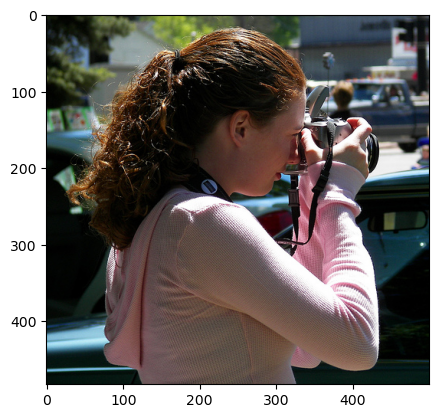

In [36]:
img_to_test = 'Flicker8k_Dataset/150582765_bad8dec237.jpg'
img = plt.imread(img_to_test)
plt.imshow(img)

def extract_features(filename):
    # load the model
    model = VGG16()
    # re-structure the model
    model.layers.pop()
    model = Model(inputs=model.inputs, outputs=model.layers[-1].output)
    # load the photo
    image = load_img(filename, target_size=(224, 224))
    # convert the image pixels to a numpy array
    image = img_to_array(image)
    # reshape data for the model
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    # prepare the image for the VGG model
    image = preprocess_input(image)
    # get features
    feature = model.predict(image, verbose=0)
    return feature

max_length = 34
model = load_model('model_9.h5')

# load and prepare the photograph
photo = extract_features(img_to_test)
# Generate description
description = predict_desc(model, tokenizer, photo, max_length)

description = ' '.join(description.split()[1:-1])

print('Actual caption: ', train_descriptions['150582765_bad8dec237'])
print()
print('Predicted: ', description)